# 뉴스 요약봇 만들기
## **학습 목표**

---

- **Extractive/Abstractive summarization 이해하기**
- **단어장 크기를 줄이는 다양한 text normalization 적용해보기**
- **seq2seq의 성능을 Up시키는 Attention Mechanism 적용하기**

## 1. **텍스트 요약(Text Summarization)이란?**

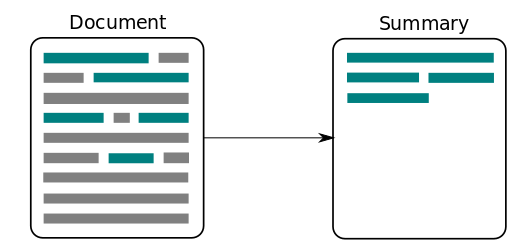

- **긴 길이의 문서(Document) 원문을 핵심 주제만으로 구성된 짧은 요약(Headlines) 문장들로 변환하는 것**
- **상대적으로 큰 텍스트인 뉴스 기사로 작은 텍스트인 뉴스 제목을 만들어내는 것**
- **요약 전후에 정보 손실 발생이 최소화**
- **요약문은 문서 원문이 담고 있는 정보를 최대한 보존하고 있어야 한다**
- **원문의 길이가 길수록 만만치 않은 어려운 작업**
- **사람이 이 작업을 수행한다 하더라도 긴 문장을 정확하게 읽고 이해한 후, 그 의미를 손상하지 않는 짧은 다른 표현으로 원문을 번역해 내야 하는 것**
<br><br>


## **추출적 요약(Extractive Summarization)**

---

**단어 그대로 원문에서 문장들을 추출해서 요약하는 방식**

**핵심적인 문장 3개를 꺼내와서 3개의 문장으로 구성된 요약문을 만드는 식**

**결과로 나온 문장들 간의 호응이 자연스럽지 않을 수 있다**

**전통적인 머신 러닝 방식에 속하는 텍스트 랭크(TextRank)와 같은 알고리즘을 사용해서 이 방법을 사용**

**가장 대표적인 것이 네이버 뉴스 서비스에 있는 `요약봇` 기능**

**TextRank 알고리즘을 통해 해당 기사를 가장 잘 대표하는 단어들로 이루어진 핵심문장을 아주 효과적으로 찾아내기 때문**
<br><br>

## **추상적 요약(Abstractive Summarization)**

---

**흥미로운 접근을 사용**

**원문으로부터 내용이 요약된 새로운 문장을 생성해내는 것**

**새로운 문장이라는 것은 결과로 나온 문장이 원문에 원래 없던 문장일 수도 있다는 것을 의미**

**자연어 생성(Natural Language Generation, NLG)의 영역인 셈**

**추출적 요약은 원문을 구성하는 문장 중 어느 것이 요약문에 들어갈 핵심문장인지를 판별한다는 점에서 문장 분류(Text Classification) 문제로 볼 수 있을 것**
<br><br>

**Q1. RNN은 학습 데이터의 길이가 길어질수록 먼 과거의 정보를 현재에 전달하기 어렵다는 문제가 있습니다. 이 문제를 해결하기 위해 LSTM과 GRU가 등장했고, 이 둘도 부족해서 어텐션(Attention) 메커니즘이 등장했지요. 이 문제의 이름은 무엇인가요?**

- **장기 의존성(long term dependencies) 문제**

**Q2. 구글에서 텍스트 요약을 위해 시도했던 접근법 중에, 텍스트마이닝 분야의 '역문서빈도(IDF)같은' 지표를 활용해 문서 안에서 중요해 보이는 부분을 추출하고 그걸 요약문에 담는 방식을 썼을 때의 문제점은 무엇이었나요?**

- **원문에서 발췌하는 방식(Extractive summarization)의 요약 기법은 어색하거나 문법적으로 이상한 결과물을 만드는 문제가 있음**

**Q3. 구글은 짧은 문장. 요약문을 생성하는 모델을 딥 러닝을 통해 end-to-end로 설계하도록 했어요. 구글이 메일서비스에 적용한 자동 회신(Smart Reply) 기능을 만든 것과 비슷한 딥러닝 기법이기도 한 인코더와 디코더의 구조로 구성된 이 딥 러닝 아키텍처의 이름은 무엇일까요?**

- **seq2seq(sequence-to-sequence)**
<br><br>


## 2. **인공 신경망으로 텍스트 요약 훈련시키기**

### 📌 **Abstractive summarization 방식의 텍스트 요약 모델 훈련**

- **seq2seq 모델**
    - **두 개의 RNN 아키텍처를 사용하여 입력 시퀀스로부터 출력 시퀀스를 생성해 내는 자연어 생성 모델**
- **원문을 요약문으로 번역한다고 생각**

### **seq2seq 개요**

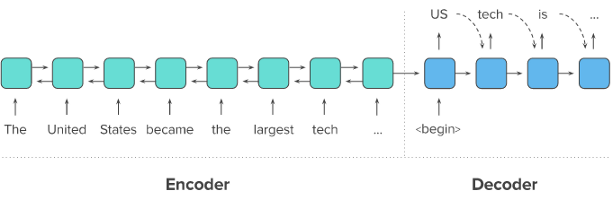

[Abstractive text headlines with Reinforcement Learning](https://medium.com/dl-for-product-and-service/abstractive-text-headlines-with-reinforcement-learning-ab2458ab29d5)

- **인코더 : 원문을 첫 번째 RNN인 인코더로 입력하면,  하나의 고정된 벡터로 변환**
    - **문맥 정보를 가지고 있는 벡터라고 하여 컨텍스트 벡터(context vector)**
- **디코더 : 두 번째 RNN인 이 컨텍스트 벡터를 전달받아 한 단어씩 생성해내서 요약 문장을 완성**
<br><br>

### **LSTM과 컨텍스트 벡터**

---

**seq2seq를 구현할 때, 인코더/디코더로  LSTM을 사용**

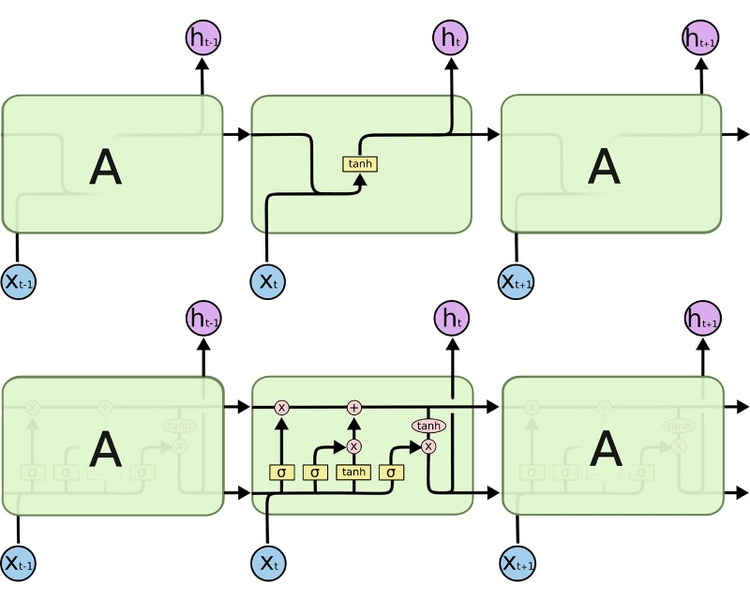

[Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)

**LSTM의 장점**

- **다음 time step의 셀에 hidden state뿐만 아니라, cell state도 함께 전달한다는 점**
- **인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state `h`와 cell state `c` 두 개의 값 모두 존재해야 한다는 뜻**
<br><br>

### **시작 토큰과 종료 토큰**

---

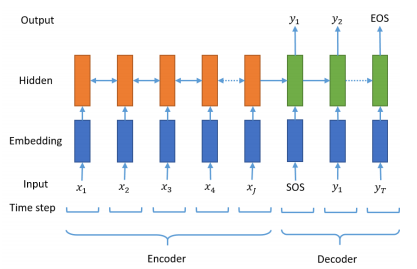

[](https://arxiv.org/pdf/1812.02303.pdf)

**seq2seq 구조에서 디코더는 시작 토큰 SOS가 입력되면, 각 시점마다 단어를 생성하고 이 과정을 종료 토큰 EOS를 예측하는 순간까지 멈추지 않으므로 훈련 데이터의 예측 대상 시퀀스의 앞, 뒤에는 시작 토큰과 종료 토큰을 넣어주는 전처리를 통해 어디서 멈춰야 하는지 알려줄 필요가 있다.**

<br><br>

### **어텐션 메커니즘을 통한 새로운 컨텍스트 벡터 사용하기**

---


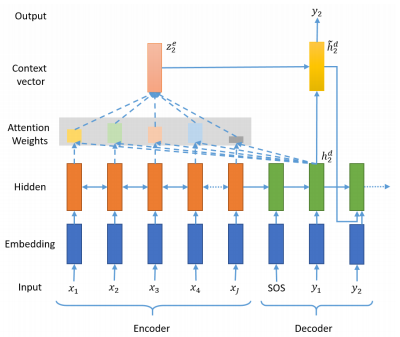
[](https://arxiv.org/pdf/1812.02303.pdf)

**기존 seq2seq를 수정하고, 새로운 모듈을 붙여 모델의 성능을 높이기 시도**

- **인코더의 마지막 time step의 hidden state를 컨텍스트 벡터로 사용**
- **RNN 계열의 인공 신경망(바닐라 RNN, LSTM, GRU)의 한계로 인해 이 컨텍스트 정보에는 이미 입력 시퀀스의 많은 정보가 손실이 된 상태**
- **디코더로 전달되는 인코더의 컨텍스트 벡터는 인코더의 마지막 스텝의 hidden state인 $h_5$**
- **텍스트 벡터는 디코더의 현재 스텝 위치에 무관하게 한번 계산되면 고정값**

**어텐션 메커니즘(Attention Mechanism)을 이용한 seq2seq**

- **인코더의 모든 step의 hidden state의 정보가 컨텍스트 벡터에 전부 반영되도록 하는 것**
- **인코더의 모든 hidden state가 동일한 비중으로 반영되는 것이 아니라, 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산되는 방식**
- **인코더의 컨텍스트 벡터 $0.2h_1+0.3h_2+0.1h_3+0.15h_4+0.25h_5$**
- **컨텍스트 벡터를 구성하기 위한 인코더 hidden state의 가중치 값은 디코더의 현재 스텝이 어디냐에 따라 계속 달라진다는 점**
- **디코더의 현재 문장 생성 부위가 주어부인지 술어부인지 목적어인지 등에 따라 인코더가 입력 데이터를 해석한 컨텍스트 벡터가 다른 값이 된다는 것**
- **디코더의 현재 스텝에 따라 동적으로 달라지는 인코더의 컨텍스트 벡터를 사용해서 현재의 예측에 활용하면, 디코더가 좀 더 정확한 예측가능**
<br><br>

### 정리

1. **seq2seq를 사용**
2. **RNN 계열 중 LSTM을 사용하므로 hidden state뿐만 아니라 cell state도 사용**
3. **디코더의 예측 시퀀스에는 시작 토큰 SOS와 예측 토큰 EOS를 시퀀스의 앞, 뒤로 붙히기**
4. **seq2seq를 구동시키면 디코더는 시작 토큰을 입력받아 예측을 시작**
5. **어텐션 메커니즘을 이용해 인코더의 hidden state의 중요도를 취합한 컨텍스트 벡터를 디코더 스텝별로 계산**
6. **계산된 컨텍스트 벡터를 이용해서 디코더는 다음 등장할 단어를 예측**
<br>

## 3. **데이터 준비하기**

**작업환경을 구성**

> $ mkdir -p ~/aiffel/news_summarization/data

**Kaggle에서 제공된 `아마존 리뷰 데이터셋`**

**[Reviews.csv.zip](https://d3s0tskafalll9.cloudfront.net/media/documents/Reviews.csv.zip) - 다운로드 받은 데이터(Reviews.csv)는 총 568,454개의 샘플**

**클라우드에 올라가있는 데이터셋을 사용**

> $ ln -s ~/data/*.csv ~/aiffel/news_summarization/data

<br> 

### **다운로드한 리뷰 파일에서 불용어를 제거**

**NLTK의 불용어(stopwords)를 사용**

**NLTK를 설치하고 NTLK의 데이터셋을 다운로드**

**NLTK(Natural Language Toolkit)** 

- **영어 기호, 통계, 자연어 처리를 위한 라이브러리**
- **I, my, me, over, 조사, 접미사와 같이 문장에는 자주 등장하지만, 의미를 분석하고 요약하는 데는 거의 의미가 없는 100여개의 불용어가 미리 정리**
<br> <br> 

**NLTK 패키지에서 불용어 사전을 다운로드하고, 데이터 전처리를 위한 나머지 패키지 가져오기**

# [E-08] News_Summarization
## Step 1. 데이터 가져오기

In [1]:
# NLTK 패키지에서 불용어 사전을 다운로드하고, 데이터 전처리를 위한 나머지 패키지 가져오기
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# 데이터를 다운로드

urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

print('전체 샘플수 :', (len(data)))

# 일부 출력
data.head(5)

전체 샘플수 : 98401


,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [3]:
# 컬럼 이름, 위치 변경
data.columns = ['Headlines', 'Text']
data = data[['Text', 'Headlines']]
data.head()

,Text,Headlines
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


## Step 2**. 데이터 전처리하기**
<br>

### **중복 샘플과 NULL 값이 존재하는 샘플 제거**

In [4]:
# 중복 샘플 유무를 확인
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['Headlines'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
Headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [5]:
# drop_duplicates()를 사용하여 중복 샘플을 제거
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [6]:
# Null 값이 있는지 확인하는 방법 : .isnull().sum()을 사용
print(data.isnull().sum())

Text         0
Headlines    0
dtype: int64


In [7]:
# Headlines에 1개의 Null값 dropna() 함수를 사용해서 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


### **텍스트 정규화와 불용어 제거**

---

**텍스트 정규화(text normalization)**

- **기계 학습 전에 미리 같은 표현으로 통일시켜주는 것**

**[정규화 사전 출처](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)**

In [8]:
# 텍스트 정규화(text normalization)
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


**불용어(stopwords)**

- **텍스트에는 자주 등장하지만 자연어 처리시 실질적으로 별 도움이 되지 않는 단어들이 존재**

<br>

**NLTK에서 제공하는 불용어 리스트를 참조**

In [9]:
# 불용어 리스트를 참조
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

### 전처리함수

---

- **모든 영어 문자는 소문자로 만들기**
- **html 태그를 제거**
- **정규 표현식을 통해 각종 특수문자를 제거**
- **불용어 제거 - Text 전처리 시에서만 호출**
    - **함수의 인자로 `remove_stopwords`를 추가하고, if문을 추가**
    - **remove_stopwords=True로 주면 불용어처리.**
    - **remove_stopwords=False로 주면 불용어미처리**

In [10]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Headlines)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

### Text  데이터 전처리

In [11]:
# 훈련 데이터 Text 전처리를 수행
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

### Headlines 데이터 전처리

In [12]:
### Headlines 데이터 전처리# 훈련 데이터 Headlines 전처리 - 두 번째 인자로 False
clean_headlines = []
# 전체 Headlines 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['Headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print("Headlines 전처리 후 결과: ", clean_headlines[:5])

Headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


#### 정리한 데이터들을 데이터프레임에 재저장,   
#### 빈(empty) 값을 가진 샘플들이 있다면, 모두 Null 값을 가진 샘플로 대체

In [13]:
# 정리한 데이터들을 데이터프레임에 재저장
data['Text'] = clean_text
data['Headlines'] = clean_headlines

In [14]:
# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

# Null 값 확인
print("전처리후 데이터 Null 값 확인 :\n", data.isnull().sum())

전처리후 데이터 Null 값 확인 :
 Text         0
Headlines    0
dtype: int64


In [15]:
# Null 값 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


##  Step 3. 훈련데이터와 테스트데이터 나누기

### **3.1 샘플의 최대 길이 정하기**

<br>

1. **Text와 Headlines 최소, 최대, 평균 길이를 구하기 위해 데이터 시각화**
2. **Text의 최대 길이와 Headlines의 적절한 최대 길이 정하기**
3. **비율 계산하는 함수 만들기 & 샘플의 포함 비율 확인하기**
4. **정해진 길이보다 길면 제외하는 방법으로 데이터를 정제**
<br><br>

#### 1. Text와 Headlines 최소, 최대, 평균 길이를 구하기 & 데이터 시각화 

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


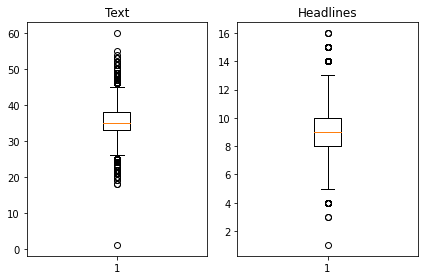

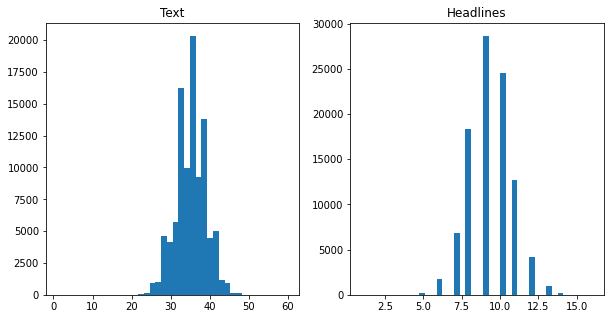

In [16]:
# Text와 Headlines의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
headlines_len = [len(s.split()) for s in data['Headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title('Text')
axs[0].hist(text_len, bins = 40)
axs[1].set_title('Headlines')
axs[1].hist(headlines_len, bins = 40)
plt.show()

#### 2. Text의 최대 길이와 Headlines의 적절한 최대 길이 정하기

In [17]:
#### 2. Text의 최대 길이와 Headlines의 적절한 최대 길이 정하기# Text의 최대 길이와 Headlines의 적절한 최대 길이 정하기
text_max_len = 40
headlines_max_len = 10

#### 3. 비율 계산하는 함수 만들기 & 샘플의 포함 비율 확인하기

In [18]:
# 데이터의 몇 %가 해당하는지 계산하는 함수만들기
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

# Text와 Headlines에 적용해 우리가 결정한 임의의 길이가 몇%의 샘플까지 포함하는지 확인
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(headlines_max_len,  data['Headlines'])

전체 샘플 중 길이가 40 이하인 샘플의 비율: 0.9238714924766165
전체 샘플 중 길이가 10 이하인 샘플의 비율: 0.8162972753151687


#### 4. 정해진 길이보다 길면 제외하는 방법으로 데이터 정제

In [19]:
# 정해진 길이보다 길면 제외하는 방법으로 데이터를 정제
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 74102


### **시작 토큰과 종료 토큰 추가하기**

---

**seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요**

**시작 토큰은 `sostoken`, 종료 토큰은 `eostoken`이라 임의로 명명하고 앞, 뒤로 추가**

**`decoder_input` :디코더의 입력에 해당 & 시작 토큰이 맨 앞에 있는 문장**

**`decoder_target` : 디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장**

In [20]:
# 디코더에 시작 토큰과 종료 토큰 추가하기
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Headlines'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Headlines,decoder_input,decoder_target
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,pakistani singer rahat fateh ali khan denied r...,rahat fateh ali khan denies getting notice for...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
9,congress candidate shafia zubair ramgarh assem...,cong wins ramgarh bypoll in rajasthan takes to...,sostoken cong wins ramgarh bypoll in rajasthan...,cong wins ramgarh bypoll in rajasthan takes to...
10,two minor cousins uttar pradesh gorakhpur alle...,up cousins fed human excreta for friendship wi...,sostoken up cousins fed human excreta for frie...,up cousins fed human excreta for friendship wi...


### 3.3 인코더의 입력, 디코더의 입력, 타겟(레이블)을 Numpy 배열로 변환

In [21]:
### 3.3 인코더의 입력, 디코더의 입력, 타겟(레이블)을 Numpy 배열로 변환# 인코더의 입력, 디코더의 입력과 레이블 Numpy 타입으로 저장
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

### **훈련 데이터와 테스트 데이터를 분리 - 직접 코딩**

1. **`encoder_input`과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 만들기**
2. **정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의**
3. **전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의**
4. **훈련, 테스트 세트 나누기**

#### 1. encoder_input과 크기가 같은 정수 시퀀스 만들기

In [22]:
#### 1. encoder_input과 크기가 같은 정수 시퀀스 만들기# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 만들기
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[16849 15474 25895 ... 51120 12391 15758]


#### 2. 정수 시퀀스를 이용해 데이터의 샘플 순서를 정의

In [23]:
#### 2. 정수 시퀀스를 이용해 데이터의 샘플 순서를 정의# 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

#### 3. 전체 데이터의 크기에 0.2를 곱해서 테스트 데이터의 크기를 정의

In [24]:
# 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 14820


#### 4. 훈련, 테스트 세트 나누기

In [25]:
#### 4. 훈련, 테스트 세트 나누기# 훈련, 테스트 세트 나누기
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 59282
훈련 레이블의 개수 : 59282
테스트 데이터의 개수 : 14820
테스트 레이블의 개수 : 14820


In [26]:
# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 만들기
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

# 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

# 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

# 훈련, 테스트 세트 나누기
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

[50850  6483 49778 ... 32452 44865  8553]
테스트 데이터의 수 : 14820
훈련 데이터의 개수 : 59282
훈련 레이블의 개수 : 59282
테스트 데이터의 개수 : 14820
테스트 레이블의 개수 : 14820


## **Step 4. 정수 인코딩**

### **단어 집합(vocabulary) 만들기 & 정수 인코딩 & 패딩**

---

- **Keras의 토크나이저를 사용하여 입력된 훈련 데이터로부터 단어 집합을 만들기**
   - **📌 [Tokenizer](https://han-py.tistory.com/284)**
   - **Tokenizer를 사용하면 (단어:인덱스)형태의 딕셔너리 반환**
   
<br>

- **기계가 텍스트를 숫자로 처리할 수 있도록 데이터의 단어들을 모두 정수로 바꾸어 주기**

<br><br>
 
#### 🦺 훈련데이터 정수 인코딩을 하기 위한 단어집합 만들기
**1. 임시로 훈련 데이터에 대해서 단어 집합을 만들기(원문에 해당되는 `encoder_input_train`에 대해서 단어 집합을 만들기)**
- **단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여**
- **완성된 단어 집합은 [src_tokenizer.word_index](https://codetorial.net/tensorflow/natural_language_processing_in_tensorflow_01.html)에 저장**  

**2. 빈도수가 낮은 단어들은 훈련 데이터에서 제외하기 위해 비율 확인**

- **등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인**
- **[src_tokenizer.word_counts.items()](https://wikidocs.net/31766)에는 단어와 각 단어의 등장 빈도수가 저장**

**3. 비율 확인 후 Tokenizer 재정의 (단어 집합의 크기를 num_words의 제한)**



**3. 비율 확인 후 Tokenizer 재정의 (단어 집합의 크기를 num_words의 제한)**



In [27]:
# 1. 훈련 데이터에 대해서 단어 집합을 만들기
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

# 2. 등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 61409
등장 빈도가 6번 이하인 희귀 단어의 수: 42136
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 19273
단어 집합에서 희귀 단어의 비율: 68.61534954159814
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.182233631083802


In [28]:
# 3. 단어 집합의 크기를 19,000으로 제한
src_vocab = 19000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 19,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

#### 🦺 단어집합 정수 인코딩
**`texts_to_sequences()`**

- **생성된 단어 집합에 기반한 입력 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행**

In [29]:
# 4. 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[2634, 5322, 473, 12170, 126, 5803, 3066, 500, 13, 165, 5595, 111, 13, 767, 99, 13, 5803, 1043, 42, 13, 767, 361, 6317, 2437, 208, 12170, 6, 6420, 236, 2425, 87, 3273], [525, 88, 21, 49, 438, 1081, 19, 8, 9745, 2061, 458, 586, 487, 458, 385, 525, 262, 28, 120, 730, 9745, 2061, 19, 979, 269, 2061, 5189, 525, 2870, 4244, 126, 195, 21], [1570, 652, 12, 48, 956, 600, 10, 243, 4490, 8254, 39, 3711, 3537, 6745, 4791, 10633, 2889, 1188, 49, 5133, 2571, 3, 560, 2024, 1688, 259, 54, 10633, 556, 11319, 6745, 3711, 584, 933]]


#### 🦺 Headlines 데이터 정수 인코딩
**1. Headlines 데이터에 대해서 단어 집합을 만들기**  
**2.`tar_tokenizer.word_counts.items()`에는 단어와 각 단어의 등장 빈도수가 저장**
- **등장 빈도수가 6회 미만인 단어들이 이 데이터에서 어느 정도의 비중을 차지하는지 확인**  

**3. 단어 집합의 크기를 2,000로 제한**

In [30]:
# 1. Headlines 데이터 정수인코딩
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

# 2. 등장 빈도수가 6회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 27209
등장 빈도가 5번 이하인 희귀 단어의 수: 18164
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9045
단어 집합에서 희귀 단어의 비율: 66.75732294461392
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.969181138032809


In [31]:
# 3. 단어 집합의 크기를 9,000로 제한
tar_vocab = 9000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

#### 🦺 Headlines 데이터 정수 인코딩

In [32]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)#### 🦺 Headlines 데이터 정수 인코딩

#### 🦺 훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 `drop_train`과 `drop_test`라는 변수에 저장 후 샘플들은 모두 삭제**
- **길이가 1인 이유는 시작, 종료 토큰을 넣었으므로..**

In [33]:
# 요약문의 길이가 1인 인덱스를 각각 drop_train과 drop_test라는 변수에 저장 후 샘플들은 모두 삭제
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 0
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 59282
훈련 레이블의 개수 : 59282
테스트 데이터의 개수 : 14820
테스트 레이블의 개수 : 14820


#### 🦺 패딩하기
- **짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이 맞추기**

In [34]:
# 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이 맞추기
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

## Step 5. **모델 설계하기**

### **함수형 API를 이용해서 인코더를 설계**

- **임베딩 벡터의 차원은 128로 정의**
- **hidden state의 크기를 256으로 정의**
    - **hidden state는 LSTM에서 얼만큼의 수용력(capacity)를 가질지를 정하는 파라미터**
    - **파라미터는 LSTM의 용량의 크기나, LSTM에서의 뉴런의 개수라고 이해**
    - **무조건 용량을 많이 준다고 해서 성능이 반드시 올라가는 것은 아니다**
- **인코더의 LSTM은 총 3개의 층으로 구성**
    - **dropout 뿐 아니라 recurrent dropout까지 사용**
        - **dropout : 레이어의 weight를 랜덤으로 생략하여 모델의 과적합(overfitting)을 해결해주는 방법**
        - **recurrent dropout : dropout을 레이어가 아닌 time step마다 해주는 방식**
            - **time step의 입력을 랜덤으로 생략**
            - **일반적인 dropout와 같이 regularization을 해주는 효과가 있고, 과적합을 방지할 수 있다**  
            
            
 <br>   
 
**일반적인 dropout과, dropout과 recurrent dropout을 동시에 사용한 예**  
            
**Variational Dropout : dropout과 recurrent dropout을 모두 사용한 것** 
                
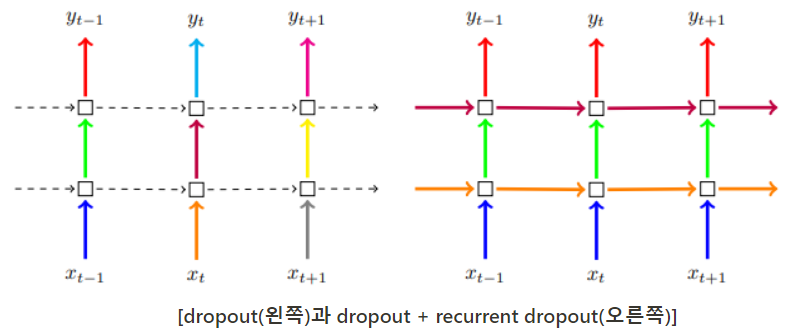
    
### 🎁 [참고문헌](https://arxiv.org/pdf/1512.05287.pdf)
    
<br>

**참고로 recurrent dropout을 사용하면 아래와 같은 경고문이 뜹니다.**

```
WARNING:tensorflow:Layer lstm_15 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU
```

**recurrent dropout을 사용할 시 cuDNN을 사용할 수 없어서 recurrent dropout을 사용하지 않을 때보다 학습 시간이 오래 걸립니다.**

**recurrent dropout에 대한 자세한 내용은 아래의 논문을 참고**

- **[Recurrent Dropout without Memory Loss](https://arxiv.org/pdf/1603.05118v2.pdf)**

In [35]:
# 함수형 API를 이용해서 인코더를 설계
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

### **디코더 입력층 설계**

---

**LSTM의 입력을 정의할 때, `initial_state`의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 해요.**

In [36]:
# 디코더 입력층 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

### **어텐션 메커니즘을 이용한 디코더의 출력층 설계**

---


**seq2se2의 디코더의 출력층**

- **Headlines의 단어장인 `tar_vocab`의 수많은 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제**
- **Dense의 인자로 `tar_vocab`을 주고, 활성화 함수로 소프트맥스 함수를 사용**
<br>

#### **어텐션 메커니즘**

---

**어텐션 메커니즘을 수행하는 어텐션 함수를 설계하는 것은 또 다른 새로운 신경망을 설계해야 한다**

**TensorFlow에 이미 구현된 어텐션 함수를 가져와서 디코더의 출력층에 어떤 방식으로 결합하는지 배우기**

**Bahdanau스타일의 어텐션 함수 사용**

**어텐션에 대한 자세한 설명은 [텐서플로우 홈페이지](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AdditiveAttention)를 참고**

**어텐션 층을 만들고, 위에서 설계한 디코더의 출력층을 수정**

- **인코더의 hidden state들과 디코더의 hidden state들을 어텐션 함수의 입력으로 사용**
- **어텐션 함수가 리턴한 값을 예측 시에 디코더의 hidden state와 함께 활용하는 형태로 작동**

In [37]:
# 어텐션 층을 만들고, 위에서 설계한 디코더의 출력층을 수정
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 128)      2432000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 40, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

## Step 6. **모델 훈련하기**

**'조기 종료'를 뜻하는 `EarlyStopping`은 특정 조건이 충족되면 훈련을 멈추는 역할**

- **es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)**
    - **`val_loss`(검증 데이터의 손실)을 관찰하다가, 검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 2회(patience=2) 관측되면 학습을 멈추도록 설정**

✍️ **[Early Stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)**

In [40]:
# 모델 훈련하기
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
cb = ModelCheckpoint('best-model.h5')
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=1024, callbacks=[cb, es], epochs=50)

Epoch 1/50
58/58 [==============================] - 52s 758ms/step - loss: 5.8572 - val_loss: 5.6752
Epoch 2/50
58/58 [==============================] - 44s 762ms/step - loss: 5.6569 - val_loss: 5.5375
Epoch 3/50
58/58 [==============================] - 43s 751ms/step - loss: 5.4974 - val_loss: 5.3985
Epoch 4/50
58/58 [==============================] - 44s 752ms/step - loss: 5.3518 - val_loss: 5.2902
Epoch 5/50
58/58 [==============================] - 43s 750ms/step - loss: 5.2129 - val_loss: 5.2312
Epoch 6/50
58/58 [==============================] - 42s 730ms/step - loss: 5.0749 - val_loss: 5.0844
Epoch 7/50
58/58 [==============================] - 40s 687ms/step - loss: 4.9393 - val_loss: 4.9980
Epoch 8/50
58/58 [==============================] - 40s 683ms/step - loss: 4.8139 - val_loss: 4.9027
Epoch 9/50
58/58 [==============================] - 40s 682ms/step - loss: 4.6926 - val_loss: 4.8513
Epoch 10/50
58/58 [==============================] - 39s 681ms/step - loss: 4.5843 - val_lo

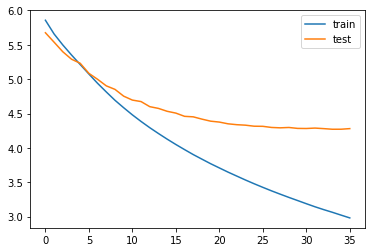

In [41]:
# 훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정을 시각화
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Step 7. **인퍼런스 모델 구현하기**

**정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원**

**필요한 3개의 사전을 준비**

In [42]:
# 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원
# 필요한 3개의 사전을 준비
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

### **seq2seq**

- **훈련, 실제 동작 시(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행**
- **훈련 단계**
    - **디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교할 수 있으므로, 인코더와 디코더를 엮은 통짜 모델 하나만 준비**
- **인퍼런스 단계**
    - **정답 문장이 없으므로 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작**
    - **인퍼런스를 위해 별도로 모델 설계**
- **인코더 모델과 디코더 모델을 분리해서 설계**

<br>

### 인코더 모델

1. 생각보다 번역이 맘에 들지 않아서 몇 번 모델을 돌려봤는 데, 저장해 놓았던 'best_attn_model.h5'를 사용하면 어떨까??
2. 저장해 놓았던 'best_attn_model.h5'를 로드해서 모델로 설계를 했는 데....
3. 원래 설계했던 모델의 매개변수랑, encoder_model의 매개변수가 달라서 모델을 인식하지 못한다..
4. 구글링 해 보니 좀 복잡하게 로드하는 방법이 보이나 아직 거기까지 음....
5. 아직 RNN의 모델 구조를 완벽하게 이해하지 못해서 어디에서 건들여야 할 지 막막해서 기록만.. 남김..
6. 더 공부해야 할 부분인 듯..

In [43]:
from tensorflow import keras
from tensorflow.keras.models import load_model

best_attn_model = load_model('best_attn_model.h5')
# 인코더 설계
encoder_model = best_attn_model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

TypeError: call() got an unexpected keyword argument 'outputs'

### 원래 인코더 모델 설계

In [44]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

### 어텐션 메커니즘을 사용하는 출력층을 설계

In [45]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

### 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만들기

In [46]:
# 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만들기
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

## Step 8. **모델 테스트하기**
---

**테스트 단계**

- **정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인하는 것이 편리**
- **주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만들기**
    - **Text의 정수 시퀀스 : 패딩을 위해 사용되는 숫자 0을 제외**
    - **Headlines의 정수 시퀀스 : 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외.**

In [47]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2headlines(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [48]:
# 테스트 데이터 약 10개의 샘플에 대해서 실제 요약과 예측된 요약을 비교
for i in range(50, 60):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2headlines(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : comparing microsoft technology firms company ceo satya nadella recent interview said microsoft web would happened nadella highlighted closed technology firms rigged current ecosystem compared microsoft used 
실제 요약 : without an open microsoft web would not have happened ceo 
예측 요약 :  microsoft is the new computer ceo


원문 : qatar claimed russian hackers planted fake news story led saudi arabia regional allies breaking ties nation prompting country biggest crisis three decades news story qatari emir reported criticising us president donald trump hailing saudi arabia regional rival iran islamic power 
실제 요약 : qatar blames russian hackers for its diplomatic crisis 
예측 요약 :  us hackers sue qatar for trump aid to trump


원문 : talking people towards single women tabu said think society problem accepting woman single choice added people concern always single women celebrity tabu said used get bothered earlier anymore 
실제 요약 : society has problem in accepting women being single tabu 
예측 요약

### 평가 

---

- **patience를 2회로 주고 번역을 했는 데 별로 성능이 좋지는 않다..**
- **pztience=3으로 도전**


##  새로운 모델 다시 만들기 - patience = 3

In [53]:
# 함수형 API를 이용해서 인코더를 설계
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [54]:
# 디코더 입력층 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [55]:
# 어텐션 층을 만들고, 위에서 설계한 디코더의 출력층을 수정
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model_2 = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model_2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 40, 128)      2432000     input_6[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 40, 256), (N 394240      embedding_2[0][0]                
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [56]:
# 모델 훈련하기
model_2.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model_2.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=1024, callbacks=[es], epochs=50)

Epoch 1/50
58/58 [==============================] - 49s 711ms/step - loss: 6.6843 - val_loss: 6.3321
Epoch 2/50
58/58 [==============================] - 40s 687ms/step - loss: 6.2399 - val_loss: 6.0281
Epoch 3/50
58/58 [==============================] - 40s 699ms/step - loss: 6.0064 - val_loss: 5.8703
Epoch 4/50
58/58 [==============================] - 41s 712ms/step - loss: 5.8417 - val_loss: 5.7726
Epoch 5/50
58/58 [==============================] - 58s 1s/step - loss: 5.6764 - val_loss: 5.5534
Epoch 6/50
58/58 [==============================] - 58s 991ms/step - loss: 5.4975 - val_loss: 5.4414
Epoch 7/50
58/58 [==============================] - 58s 1s/step - loss: 5.3469 - val_loss: 5.2938
Epoch 8/50
58/58 [==============================] - 58s 1s/step - loss: 5.2101 - val_loss: 5.1747
Epoch 9/50
58/58 [==============================] - 58s 1s/step - loss: 5.0717 - val_loss: 5.0787
Epoch 10/50
58/58 [==============================] - 58s 1s/step - loss: 4.9373 - val_loss: 4.9776
Epoc

## **인퍼런스 모델 구현하기**

**정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원**

**필요한 3개의 사전을 준비**

In [57]:
# 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원
# 필요한 3개의 사전을 준비
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

### 인코더 모델 설계2

In [58]:
# 인코더 설계
encoder_model_2 = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

### 어텐션 메커니즘을 사용하는 출력층을 설계2

In [59]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model_2 = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

### 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만들기2

In [60]:
# 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만들기
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model_2.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model_2.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

## **모델 테스트하기2**


In [61]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2headlines(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [62]:
# 테스트 데이터 약 10개의 샘플에 대해서 실제 요약과 예측된 요약을 비교
for i in range(50, 60):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2headlines(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : comparing microsoft technology firms company ceo satya nadella recent interview said microsoft web would happened nadella highlighted closed technology firms rigged current ecosystem compared microsoft used 
실제 요약 : without an open microsoft web would not have happened ceo 
예측 요약 :  microsoft is not interested in india microsoft ceo


원문 : qatar claimed russian hackers planted fake news story led saudi arabia regional allies breaking ties nation prompting country biggest crisis three decades news story qatari emir reported criticising us president donald trump hailing saudi arabia regional rival iran islamic power 
실제 요약 : qatar blames russian hackers for its diplomatic crisis 
예측 요약 :  us to pay crore to us military attack report


원문 : talking people towards single women tabu said think society problem accepting woman single choice added people concern always single women celebrity tabu said used get bothered earlier anymore 
실제 요약 : society has problem in accepting women being 

### 평가
조금 더 좋아진 듯 하지만 loss가 4점대라서 애매하다...

## 95% 포함하는 사전 만들기 - 이건 다른 노트에서 진행한 것 복붙..

# [E-08] News_Summarization
## Step 1. 데이터 가져오기

In [1]:
# NLTK 패키지에서 불용어 사전을 다운로드하고, 데이터 전처리를 위한 나머지 패키지 가져오기
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# 데이터를 다운로드

urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

print('전체 샘플수 :', (len(data)))

# 일부 출력
data.head(5)

전체 샘플수 : 98401


,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [3]:
# 컬럼 이름, 위치 변경
data.columns = ['Headlines', 'Text']
data = data[['Text', 'Headlines']]
data.head()

,Text,Headlines
0,"Saurav Kant, an alumnus of upGrad and IIIT-B's...",upGrad learner switches to career in ML & Al w...
1,Kunal Shah's credit card bill payment platform...,Delhi techie wins free food from Swiggy for on...
2,New Zealand defeated India by 8 wickets in the...,New Zealand end Rohit Sharma-led India's 12-ma...
3,"With Aegon Life iTerm Insurance plan, customer...",Aegon life iTerm insurance plan helps customer...
4,Speaking about the sexual harassment allegatio...,"Have known Hirani for yrs, what if MeToo claim..."


## Step 2**. 데이터 전처리하기**
<br>

### **중복 샘플과 NULL 값이 존재하는 샘플 제거**

In [4]:
# 중복 샘플 유무를 확인
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Headlines 열에서 중복을 배제한 유일한 샘플의 수 :', data['Headlines'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 98360
Headlines 열에서 중복을 배제한 유일한 샘플의 수 : 98280


In [5]:
# drop_duplicates()를 사용하여 중복 샘플을 제거
# inplace=True 를 설정하면 DataFrame 타입 값을 return 하지 않고 data 내부를 직접적으로 바꿉니다
data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


In [6]:
# Null 값이 있는지 확인하는 방법 : .isnull().sum()을 사용
print(data.isnull().sum())

Text         0
Headlines    0
dtype: int64


In [7]:
# Headlines에 1개의 Null값 dropna() 함수를 사용해서 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


### **텍스트 정규화와 불용어 제거**

---

**텍스트 정규화(text normalization)**

- **기계 학습 전에 미리 같은 표현으로 통일시켜주는 것**

**[정규화 사전 출처](https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python)**

In [8]:
# 텍스트 정규화(text normalization)
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


**불용어(stopwords)**

- **텍스트에는 자주 등장하지만 자연어 처리시 실질적으로 별 도움이 되지 않는 단어들이 존재**

<br>

**NLTK에서 제공하는 불용어 리스트를 참조**

In [9]:
# 불용어 리스트를 참조
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

### 전처리함수

---

- **모든 영어 문자는 소문자로 만들기**
- **html 태그를 제거**
- **정규 표현식을 통해 각종 특수문자를 제거**
- **불용어 제거 - Text 전처리 시에서만 호출**
    - **함수의 인자로 `remove_stopwords`를 추가하고, if문을 추가**
    - **remove_stopwords=True로 주면 불용어처리.**
    - **remove_stopwords=False로 주면 불용어미처리**

In [10]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Headlines)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

### Text  데이터 전처리

In [11]:
# 훈련 데이터 Text 전처리를 수행
clean_text = []
# 전체 Text 데이터에 대한 전처리 : 10분 이상 시간이 걸릴 수 있습니다. 
for s in data['Text']:
    clean_text.append(preprocess_sentence(s))

# 전처리 후 출력
print("Text 전처리 후 결과: ", clean_text[:5])

Text 전처리 후 결과:  ['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers', 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit', 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history', 'aegon life iterm insurance plan customers enjoy tax benefits premiums paid save taxes plan provides life cover age years also customers options insur

### Headlines 데이터 전처리

In [12]:
### Headlines 데이터 전처리# 훈련 데이터 Headlines 전처리 - 두 번째 인자로 False
clean_headlines = []
# 전체 Headlines 데이터에 대한 전처리 : 5분 이상 시간이 걸릴 수 있습니다. 
for s in data['Headlines']:
    clean_headlines.append(preprocess_sentence(s, False))

print("Headlines 전처리 후 결과: ", clean_headlines[:5])

Headlines 전처리 후 결과:  ['upgrad learner switches to career in ml al with salary hike', 'delhi techie wins free food from swiggy for one year on cred', 'new zealand end rohit sharma led india match winning streak', 'aegon life iterm insurance plan helps customers save tax', 'have known hirani for yrs what if metoo claims are not true sonam']


#### 정리한 데이터들을 데이터프레임에 재저장,   
#### 빈(empty) 값을 가진 샘플들이 있다면, 모두 Null 값을 가진 샘플로 대체

In [13]:
# 정리한 데이터들을 데이터프레임에 재저장
data['Text'] = clean_text
data['Headlines'] = clean_headlines

In [14]:
# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

# Null 값 확인
print("전처리후 데이터 Null 값 확인 :\n", data.isnull().sum())

전처리후 데이터 Null 값 확인 :
 Text         0
Headlines    0
dtype: int64


In [15]:
# Null 값 제거
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 98360


##  Step 3. 훈련데이터와 테스트데이터 나누기

### **3.1 샘플의 최대 길이 정하기**

<br>

1. **Text와 Headlines 최소, 최대, 평균 길이를 구하기 위해 데이터 시각화**
2. **Text의 최대 길이와 Headlines의 적절한 최대 길이 정하기**
3. **비율 계산하는 함수 만들기 & 샘플의 포함 비율 확인하기**
4. **정해진 길이보다 길면 제외하는 방법으로 데이터를 정제**
<br><br>

#### 1. Text와 Headlines 최소, 최대, 평균 길이를 구하기 & 데이터 시각화 

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


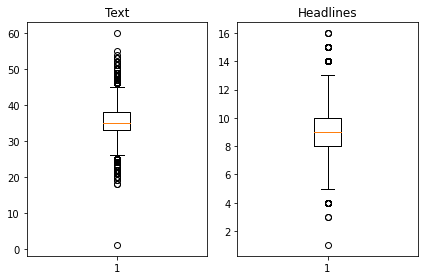

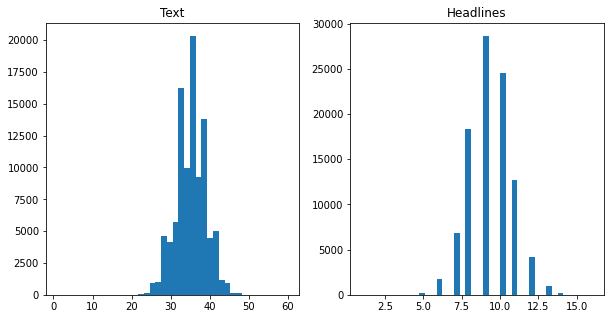

In [16]:
# Text와 Headlines의 최소, 최대, 평균 길이를 구하고 또한 길이 분포를 시각화
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['Text']]
headlines_len = [len(s.split()) for s in data['Headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(headlines_len)))
print('요약의 최대 길이 : {}'.format(np.max(headlines_len)))
print('요약의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('Text')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('Headlines')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title('Text')
axs[0].hist(text_len, bins = 40)
axs[1].set_title('Headlines')
axs[1].hist(headlines_len, bins = 40)
plt.show()

#### 2. Text의 최대 길이와 Headlines의 적절한 최대 길이 정하기

In [17]:
#### 2. Text의 최대 길이와 Headlines의 적절한 최대 길이 정하기# Text의 최대 길이와 Headlines의 적절한 최대 길이 정하기
text_max_len = 41
headlines_max_len = 11

#### 3. 비율 계산하는 함수 만들기 & 샘플의 포함 비율 확인하기

In [18]:
# 데이터의 몇 %가 해당하는지 계산하는 함수만들기
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

# Text와 Headlines에 적용해 우리가 결정한 임의의 길이가 몇%의 샘플까지 포함하는지 확인
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(headlines_max_len,  data['Headlines'])

전체 샘플 중 길이가 41 이하인 샘플의 비율: 0.9549613664091094
전체 샘플 중 길이가 11 이하인 샘플의 비율: 0.9449877999186661


#### 4. 정해진 길이보다 길면 제외하는 방법으로 데이터 정제

In [19]:
# 정해진 길이보다 길면 제외하는 방법으로 데이터를 정제
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Headlines'].apply(lambda x: len(x.split()) <= headlines_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88749


### **시작 토큰과 종료 토큰 추가하기**

---

**seq2seq 훈련을 위해서는 디코더의 입력과 레이블에 시작 토큰과 종료 토큰을 추가할 필요**

**시작 토큰은 `sostoken`, 종료 토큰은 `eostoken`이라 임의로 명명하고 앞, 뒤로 추가**

**`decoder_input` :디코더의 입력에 해당 & 시작 토큰이 맨 앞에 있는 문장**

**`decoder_target` : 디코더의 출력 또는 레이블에 해당되면서 종료 토큰이 맨 뒤에 붙는 문장**

In [20]:
# 디코더에 시작 토큰과 종료 토큰 추가하기
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['Headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Headlines'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Headlines,decoder_input,decoder_target
0,saurav kant alumnus upgrad iiit pg program mac...,upgrad learner switches to career in ml al wit...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
2,new zealand defeated india wickets fourth odi ...,new zealand end rohit sharma led india match w...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan customers enjo...,aegon life iterm insurance plan helps customer...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,pakistani singer rahat fateh ali khan denied r...,rahat fateh ali khan denies getting notice for...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
7,weeks ex cbi director alok verma told departme...,govt directs alok verma to join work day befor...,sostoken govt directs alok verma to join work ...,govt directs alok verma to join work day befor...


### 3.3 인코더의 입력, 디코더의 입력, 타겟(레이블)을 Numpy 배열로 변환

In [21]:
### 3.3 인코더의 입력, 디코더의 입력, 타겟(레이블)을 Numpy 배열로 변환# 인코더의 입력, 디코더의 입력과 레이블 Numpy 타입으로 저장
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

### **훈련 데이터와 테스트 데이터를 분리 - 직접 코딩**

1. **`encoder_input`과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 만들기**
2. **정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의**
3. **전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의**
4. **훈련, 테스트 세트 나누기**

#### 1. encoder_input과 크기가 같은 정수 시퀀스 만들기

In [22]:
# 1. encoder_input과 크기가 같은 정수 시퀀스 만들기# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 만들기
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[49730 72472 17156 ...  5168 79604 11466]


#### 2. 정수 시퀀스를 이용해 데이터의 샘플 순서를 정의

In [23]:
# 2. 정수 시퀀스를 이용해 데이터의 샘플 순서를 정의# 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

#### 3. 전체 데이터의 크기에 0.2를 곱해서 테스트 데이터의 크기를 정의

In [24]:
# 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 17749


#### 4. 훈련, 테스트 세트 나누기

In [25]:
#### 4. 훈련, 테스트 세트 나누기# 훈련, 테스트 세트 나누기
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 71000
훈련 레이블의 개수 : 71000
테스트 데이터의 개수 : 17749
테스트 레이블의 개수 : 17749


In [26]:
# encoder_input과 크기와 형태가 같은 순서가 섞인 정수 시퀀스 만들기
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

# 정수 시퀀스를 이용해 다시 데이터의 샘플 순서를 정의
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

# 전체 데이터의 크기에서 0.2를 곱해서 테스트 데이터의 크기를 정의
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

# 훈련, 테스트 세트 나누기
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

[69472 77518 85771 ...  8253  9442 80197]
테스트 데이터의 수 : 17749
훈련 데이터의 개수 : 71000
훈련 레이블의 개수 : 71000
테스트 데이터의 개수 : 17749
테스트 레이블의 개수 : 17749


## **Step 4. 정수 인코딩**

### **단어 집합(vocabulary) 만들기 & 정수 인코딩 & 패딩**

---

- **Keras의 토크나이저를 사용하여 입력된 훈련 데이터로부터 단어 집합을 만들기**
   - **📌 [Tokenizer](https://han-py.tistory.com/284)**
   - **Tokenizer를 사용하면 (단어:인덱스)형태의 딕셔너리 반환**
   
<br>

- **기계가 텍스트를 숫자로 처리할 수 있도록 데이터의 단어들을 모두 정수로 바꾸어 주기**

<br><br>
 
#### 🦺 훈련데이터 정수 인코딩을 하기 위한 단어집합 만들기
**1. 임시로 훈련 데이터에 대해서 단어 집합을 만들기(원문에 해당되는 `encoder_input_train`에 대해서 단어 집합을 만들기)**
- **단어 집합이 생성되는 동시에 각 단어에 고유한 정수가 부여**
- **완성된 단어 집합은 [src_tokenizer.word_index](https://codetorial.net/tensorflow/natural_language_processing_in_tensorflow_01.html)에 저장**  

**2. 빈도수가 낮은 단어들은 훈련 데이터에서 제외하기 위해 비율 확인**

- **등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인**
- **[src_tokenizer.word_counts.items()](https://wikidocs.net/31766)에는 단어와 각 단어의 등장 빈도수가 저장**

**3. 비율 확인 후 Tokenizer 재정의 (단어 집합의 크기를 20000으로 제한)**

In [27]:
# 1. 훈련 데이터에 대해서 단어 집합을 만들기
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

# 2. 등장 빈도수가 7회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 65924
등장 빈도가 6번 이하인 희귀 단어의 수: 44948
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 20976
단어 집합에서 희귀 단어의 비율: 68.18154238213701
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.701604224338569


In [28]:
# 3. 단어 집합의 크기를 20,000으로 제한
src_vocab = 20000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 20,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

#### 🦺 단어집합 정수 인코딩
**`texts_to_sequences()`**

- **생성된 단어 집합에 기반한 입력 텍스트 데이터의 단어들을 모두 정수로 변환하는 정수 인코딩을 수행**

In [29]:
# 4. 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[5, 113, 742, 366, 55, 1, 24, 454, 643, 1832, 1832, 496, 8867, 697, 17394, 2821, 421, 9042, 13418, 17394, 12995, 2242, 7023, 1170, 526, 6646, 1779, 1832, 33, 1, 2915, 19, 2569, 8118, 1779, 1148, 6139, 9042, 13418], [1010, 3107, 32, 3107, 187, 1184, 4640, 3107, 308, 1454, 1440, 2640, 3925, 18406, 4526, 5226, 71, 913, 32, 1524, 1258, 562, 4978, 1506, 357, 9646, 874, 1440, 32, 1150, 6069, 4409], [1277, 38, 1825, 3143, 2357, 11, 23, 89, 188, 2126, 3834, 4685, 3652, 506, 5227, 3, 14, 124, 1861, 524, 805, 1253, 1190, 8119, 674, 2144, 6647, 165, 10301, 19585, 2370, 9, 80, 1341, 1825, 2235]]


#### 🦺 Headlines 데이터 정수 인코딩
**1. Headlines 데이터에 대해서 단어 집합을 만들기**  
**2.`tar_tokenizer.word_counts.items()`에는 단어와 각 단어의 등장 빈도수가 저장**
- **등장 빈도수가 6회 미만인 단어들이 이 데이터에서 어느 정도의 비중을 차지하는지 확인**  

**3. 단어 집합의 크기를 9,000로 제한**

In [30]:
# 1. Headlines 데이터 정수인코딩
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

# 2. 등장 빈도수가 6회 미만인 단어들이 이 데이터에서 얼만큼의 비중을 차지하는지 확인
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 28852
등장 빈도가 5번 이하인 희귀 단어의 수: 18971
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 9881
단어 집합에서 희귀 단어의 비율: 65.75280743102732
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.0778283186579305


In [31]:
# 3. 단어 집합의 크기를 9,000로 제한
tar_vocab = 9000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

#### 🦺 Headlines 데이터 정수 인코딩

In [33]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

#### 🦺 훈련 데이터와 테스트 데이터에 대해서 요약문의 길이가 1인 경우의 인덱스를 각각 `drop_train`과 `drop_test`라는 변수에 저장 후 샘플들은 모두 삭제**
- **길이가 1인 이유는 시작, 종료 토큰을 넣었으므로..**

In [34]:
# 요약문의 길이가 1인 인덱스를 각각 drop_train과 drop_test라는 변수에 저장 후 샘플들은 모두 삭제
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 70999
훈련 레이블의 개수 : 70999
테스트 데이터의 개수 : 17749
테스트 레이블의 개수 : 17749


#### 🦺 패딩하기
- **짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이 맞추기**

In [35]:
# 짧은 데이터들은 뒤의 공간에 숫자 0을 넣어 최대 길이로 길이 맞추기
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

## Step 5. **모델 설계하기**

### **함수형 API를 이용해서 인코더를 설계**

- **임베딩 벡터의 차원은 128로 정의**
- **hidden state의 크기를 256으로 정의**
    - **hidden state는 LSTM에서 얼만큼의 수용력(capacity)를 가질지를 정하는 파라미터**
    - **파라미터는 LSTM의 용량의 크기나, LSTM에서의 뉴런의 개수라고 이해**
    - **무조건 용량을 많이 준다고 해서 성능이 반드시 올라가는 것은 아니다**
- **인코더의 LSTM은 총 3개의 층으로 구성**
    - **dropout 뿐 아니라 recurrent dropout까지 사용**
        - **dropout : 레이어의 weight를 랜덤으로 생략하여 모델의 과적합(overfitting)을 해결해주는 방법**
        - **recurrent dropout : dropout을 레이어가 아닌 time step마다 해주는 방식**
            - **time step의 입력을 랜덤으로 생략**
            - **일반적인 dropout와 같이 regularization을 해주는 효과가 있고, 과적합을 방지할 수 있다**  
            
            
 <br>   
 
**일반적인 dropout과, dropout과 recurrent dropout을 동시에 사용한 예**  
            
**Variational Dropout : dropout과 recurrent dropout을 모두 사용한 것** 
                
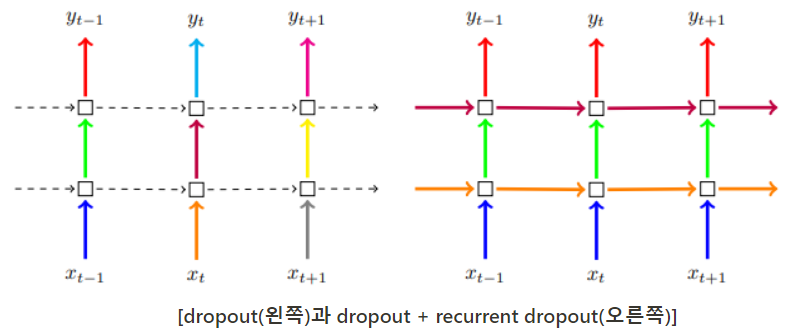
    
### 🎁 [참고문헌](https://arxiv.org/pdf/1512.05287.pdf)
    
<br>

**참고로 recurrent dropout을 사용하면 아래와 같은 경고문이 뜹니다.**

```
WARNING:tensorflow:Layer lstm_15 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU
```

**recurrent dropout을 사용할 시 cuDNN을 사용할 수 없어서 recurrent dropout을 사용하지 않을 때보다 학습 시간이 오래 걸립니다.**

**recurrent dropout에 대한 자세한 내용은 아래의 논문을 참고**

- **[Recurrent Dropout without Memory Loss](https://arxiv.org/pdf/1603.05118v2.pdf)**

In [36]:
# 함수형 API를 이용해서 인코더를 설계
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

### **디코더 입력층 설계**

---

**LSTM의 입력을 정의할 때, `initial_state`의 인자값으로 인코더의 hidden state와 cell state의 값을 넣어줘야 해요.**

In [37]:
# 디코더 입력층 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

### **어텐션 메커니즘을 이용한 디코더의 출력층 설계**

---


**seq2se2의 디코더의 출력층**

- **Headlines의 단어장인 `tar_vocab`의 수많은 선택지 중 하나의 단어를 선택하는 다중 클래스 분류 문제**
- **Dense의 인자로 `tar_vocab`을 주고, 활성화 함수로 소프트맥스 함수를 사용**
<br>

#### **어텐션 메커니즘**

---

**어텐션 메커니즘을 수행하는 어텐션 함수를 설계하는 것은 또 다른 새로운 신경망을 설계해야 한다**

**TensorFlow에 이미 구현된 어텐션 함수를 가져와서 디코더의 출력층에 어떤 방식으로 결합하는지 배우기**

**Bahdanau스타일의 어텐션 함수 사용**

**어텐션에 대한 자세한 설명은 [텐서플로우 홈페이지](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AdditiveAttention)를 참고**

**어텐션 층을 만들고, 위에서 설계한 디코더의 출력층을 수정**

- **인코더의 hidden state들과 디코더의 hidden state들을 어텐션 함수의 입력으로 사용**
- **어텐션 함수가 리턴한 값을 예측 시에 디코더의 hidden state와 함께 활용하는 형태로 작동**

In [38]:
# 어텐션 층을 만들고, 위에서 설계한 디코더의 출력층을 수정
from tensorflow.keras.layers import AdditiveAttention

# 어텐션 층(어텐션 함수)
attn_layer = AdditiveAttention(name='attention_layer')

# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out = attn_layer([decoder_outputs, encoder_outputs])


# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 41)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 41, 128)      2560000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 41, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

## Step 6. **모델 훈련하기**

**'조기 종료'를 뜻하는 `EarlyStopping`은 특정 조건이 충족되면 훈련을 멈추는 역할**

- **es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)**
    - **`val_loss`(검증 데이터의 손실)을 관찰하다가, 검증 데이터의 손실이 줄어들지 않고 증가하는 현상이 2회(patience=2) 관측되면 학습을 멈추도록 설정**

✍️ **[Early Stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)**

In [39]:
# 모델 훈련하기
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
cb = ModelCheckpoint('best-model.h5')
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=512, callbacks=[cb, es], epochs=50)

Epoch 1/50
139/139 [==============================] - 134s 874ms/step - loss: 6.1412 - val_loss: 5.7113
Epoch 2/50
139/139 [==============================] - 120s 867ms/step - loss: 5.6213 - val_loss: 5.4222
Epoch 3/50
139/139 [==============================] - 121s 868ms/step - loss: 5.3228 - val_loss: 5.1241
Epoch 4/50
139/139 [==============================] - 120s 862ms/step - loss: 5.0474 - val_loss: 4.9164
Epoch 5/50
139/139 [==============================] - 120s 866ms/step - loss: 4.8100 - val_loss: 4.7401
Epoch 6/50
139/139 [==============================] - 120s 862ms/step - loss: 4.6073 - val_loss: 4.5979
Epoch 7/50
139/139 [==============================] - 120s 864ms/step - loss: 4.4361 - val_loss: 4.4846
Epoch 8/50
139/139 [==============================] - 120s 863ms/step - loss: 4.2843 - val_loss: 4.3794
Epoch 9/50
139/139 [==============================] - 120s 864ms/step - loss: 4.1511 - val_loss: 4.3047
Epoch 10/50
139/139 [==============================] - 120s 864m

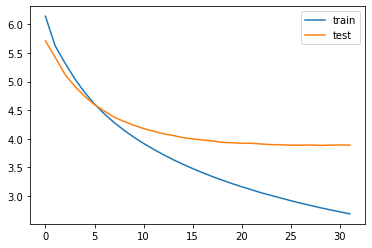

In [40]:
# 훈련 데이터의 손실과 검증 데이터의 손실이 줄어드는 과정을 시각화
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Step 7. **인퍼런스 모델 구현하기**

**정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원**

**필요한 3개의 사전을 준비**

In [41]:
# 정수 인덱스 행렬로 존재하던 텍스트 데이터를 실제 데이터로 복원
# 필요한 3개의 사전을 준비
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

### **seq2seq**

- **훈련, 실제 동작 시(인퍼런스 단계)의 방식이 다르므로 그에 맞게 모델 설계를 별개로 진행**
- **훈련 단계**
    - **디코더의 입력부에 정답이 되는 문장 전체를 한꺼번에 넣고 디코더의 출력과 한 번에 비교할 수 있으므로, 인코더와 디코더를 엮은 통짜 모델 하나만 준비**
- **인퍼런스 단계**
    - **정답 문장이 없으므로 만들어야 할 문장의 길이만큼 디코더가 반복 구조로 동작**
    - **인퍼런스를 위해 별도로 모델 설계**
- **인코더 모델과 디코더 모델을 분리해서 설계**

<br>

### 인코더 모델

In [42]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

### 어텐션 메커니즘을 사용하는 출력층을 설계

In [43]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

### 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만들기

In [44]:
# 인퍼런스 단계에서 단어 시퀀스를 완성하는 함수를 만들기
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

## Step 8. **모델 테스트하기**
---

**테스트 단계**

- **정수 시퀀스를 텍스트 시퀀스로 변환하여 결과를 확인하는 것이 편리**
- **주어진 정수 시퀀스를 텍스트 시퀀스로 변환하는 함수를 만들기**
    - **Text의 정수 시퀀스 : 패딩을 위해 사용되는 숫자 0을 제외**
    - **Headlines의 정수 시퀀스 : 숫자 0, 시작 토큰의 인덱스, 종료 토큰의 인덱스를 출력에서 제외.**

In [45]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2headlines(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [63]:
# 테스트 데이터 약 10개의 샘플에 대해서 실제 요약과 예측된 요약을 비교
for i in range(10):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2headlines(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : real madrid player marcelo admitted tax fraud accepted four month suspended jail sentence spain year old brazilian paying fine reportedly defrauded spanish authorities several footballers accused tax fraud spain including argentina lionel messi brazil neymar jr portugal cristiano ronaldo 
실제 요약 : real madrid player accepts month jail sentence for tax fraud 
예측 요약 :  brazil jail for brazil club for alleged fraud


원문 : netherlands highest court ruled satirical concept serious religion court declared along ruling denied follower church flying spaghetti monster right wear head official photographs church founded usa 
실제 요약 : dutch court rules is not religion 
예측 요약 :  vatican to legalise abortion of


원문 : year old colombian woman found dead sunday falling apartment bengaluru police said clear whether woman committed suicide fell apartment accidentally woman influence alcohol case unnatural death registered police added 
실제 요약 : colombian woman falls to death from apartment in bengal

## 9. **추출적 요약 해보기**

**추출적 요약 방법 :** 

- **본문에 존재하는 단어구, 문장을 뽑아서 요약**
- **패키지 `Summa`에서 추출적 요약을 위한 모듈인 summarize를 제공**


### **패키지 설치**

---


>$ pip list | grep summa

<br>

### **데이터 다운로드하기**

In [49]:
from summa.summarizer import summarize

# 뉴스 다운로드
# urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
df= pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

# 출력 결과 일부만 출력
df.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


### **summarize 사용하기**

---

**Summa의 summarize()의 인자로 사용되는 값**

- **text (str)** : 요약할 테스트
- **ratio (float, optional)** – 요약문에서 원본에서 선택되는 문장 비율. 0~1 사이값
- **words (int or None, optional)** – 출력에 포함할 단어 수
    - 만약, ratio와 함께 두 파라미터가 모두 제공되는 경우 ratio는 무시
- **split (bool, optional)** – True면 문장 list / False는 조인(join)된 문자열을 반환

**내부적으로 문장 토큰화를 수행문장** 

- **구분이 되어있지 않은 원문을 바로 입력으로 사용 가능**
- **비율을 적게 주어서 요약문으로 선택되는 문장의 개수를 줄이기**
- **원문의 0.005%만을 출력하도록 설정**

In [77]:
for i in range(10):
    print("원문 :", df['text'][i])
    print("실제 요약 :", df['headlines'][i])
    print("추출적 요약 :", summarize(df["text"][i], ratio=0.5))
    print("\n")

원문 : Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
실제 요약 : upGrad learner switches to career in ML & Al with 90% salary hike
추출적 요약 : upGrad's Online Power Learning has powered 3 lakh+ careers.


원문 : Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from brands like Ixigo, BookMyShow, UberEats, Cult.Fit and more.
실제 요약 : Delhi techie wins free food from Swiggy for one year on CRED
추출적 요약 : Users get one CRED coin per rupee of bill p

# 👋회고

### 이번 프로젝트에서 **어려웠던 점,**
- lstm을 사용하는 데 코드에 hidden state, cell state가 코드에 추가되서 어지러웠다..
- 아직 다 코드를 이해할 수가 없다.
- 추상적요약을 할 때 데이터 전처리를 하니 추출적 요약과 비교를 하려니 찾을 수가 없다....

### 프로젝트를 진행하면서 **알아낸 점** 혹은 **아직 모호한 점**.
#### 알아낸 점
- RNN은 역시나 어렵다..
- 수완님이 수미나에서 가르쳐 준 GPU부려먹기 성공... 근데 늦게 생각이 나서...

#### 아직 모호한 점
- RNN 전체가 다 모호함.. ㅎㅎㅎ

### 루브릭 평가 지표를 맞추기 위해 **시도한 것들**
- 단어사전의 크기를 95% 포함 지표로 맞추니 val_loss가 좋아진 것 같다..
- earlystopping을 patience를 2, 3회 줬으나.. 데이터가 부족하니 val_loss가 좋지는 않았다..

### 자기다짐
- 당황스럽기는 하지만 "알고리즘과 친해지길 바래~~ "을 하게 되서 좋아요~~~ !!
- python을 가까이... ㅎㅎㅎ